In [122]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
from pandas.tseries.offsets import DateOffset

In [152]:
df=pd.read_excel('Combined_Jan_to_Apr_2025_Molybdenum.xlsx')

In [153]:
df

,Date,BUYER,SELLER,Mean
0,2025-01-02,8685.0,8685.5,8685.25
1,2025-01-03,8700.5,8701.0,8700.75
2,2025-01-06,8893.0,8893.5,8893.25
3,2025-01-07,8885.5,8886.0,8885.75
4,2025-01-08,8846.5,8847.0,8846.75
...,...,...,...,...
78,2025-04-24,9410.0,9410.5,9410.25
79,2025-04-25,9363.5,9364.0,9363.75
80,2025-04-28,9365.0,9365.5,9365.25
81,2025-04-29,9486.5,9487.5,9487.00


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    83 non-null     datetime64[ns]
 1   BUYER   83 non-null     float64       
 2   SELLER  83 non-null     float64       
 3   Mean    83 non-null     float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 2.7 KB


In [155]:
df=df.set_index('Date')

<AxesSubplot:xlabel='Date'>

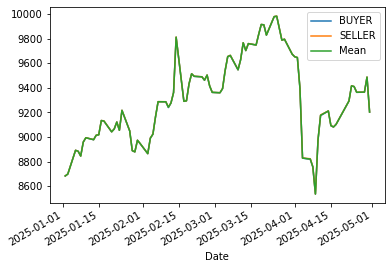

In [156]:
df.plot()

In [157]:
    def ad_test(series):
        result=adfuller(series)
        print('ADF stat:{}'.format(result[0]))
        print('p-value:{}'.format(result[1]))
        if result[1]<=0.05:
            print("strong against null hypothesis,reject,stationary")
        else:
            print('Weak against null hypothesis,accepted,non stationary')

In [158]:
ad_test(df['Mean'])

ADF stat:-2.3599532963426015
p-value:0.15335966330696854
Weak against null hypothesis,accepted,non stationary


In [159]:
df['First_diff']=df['Mean']-df['Mean'].shift(1)

In [160]:
df.head()

,BUYER,SELLER,Mean,First_diff
Date,,,,
2025-01-02,8685.0,8685.5,8685.25,NaN
2025-01-03,8700.5,8701.0,8700.75,15.5
2025-01-06,8893.0,8893.5,8893.25,192.5
2025-01-07,8885.5,8886.0,8885.75,-7.5
2025-01-08,8846.5,8847.0,8846.75,-39.0


In [161]:
ad_test(df['First_diff'].dropna())

ADF stat:-8.81209079365
p-value:1.978728880416908e-14
strong against null hypothesis,reject,stationary


<AxesSubplot:xlabel='Date'>

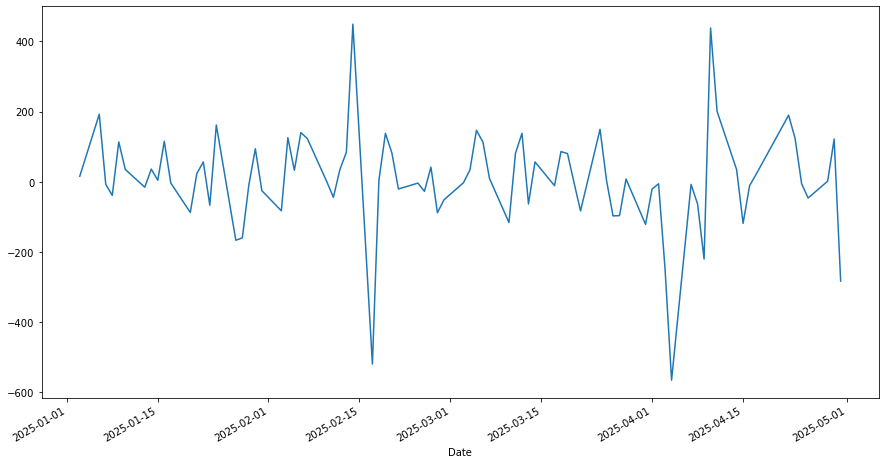

In [162]:
df['First_diff'].plot(figsize=(15,8))

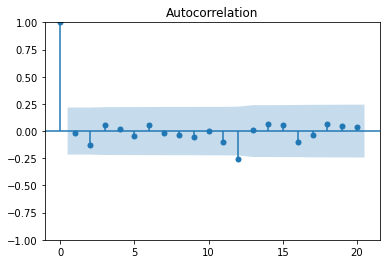

In [163]:
acf=plot_acf(df['First_diff'].dropna())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


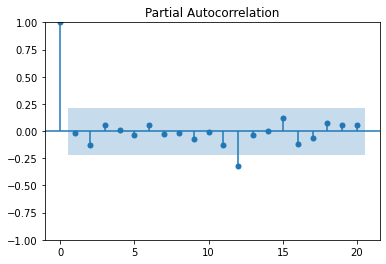

In [164]:
pacf=plot_pacf(df['First_diff'].dropna())

In [165]:
from datetime import datetime,timedelta
train_data_end=datetime(2025,4,15)
test_data_end=datetime(2025,4,30)

In [166]:
train_data=df[:train_data_end]
test_data=df[train_data_end+timedelta(days=1):test_data_end]

In [167]:
#prediction

pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [168]:
test_data

,BUYER,SELLER,Mean,First_diff
Date,,,,
2025-04-16,9082.0,9083.0,9082.50,-11.00
2025-04-17,9103.0,9104.0,9103.50,21.00
2025-04-22,9293.0,9293.5,9293.25,189.75
2025-04-23,9416.0,9416.5,9416.25,123.00
2025-04-24,9410.0,9410.5,9410.25,-6.00
2025-04-25,9363.5,9364.0,9363.75,-46.50
2025-04-28,9365.0,9365.5,9365.25,1.50
2025-04-29,9486.5,9487.5,9487.00,121.75
2025-04-30,9203.0,9204.0,9203.50,-283.50


In [169]:
train_data

,BUYER,SELLER,Mean,First_diff
Date,,,,
2025-01-02,8685.0,8685.5,8685.25,NaN
2025-01-03,8700.5,8701.0,8700.75,15.50
2025-01-06,8893.0,8893.5,8893.25,192.50
2025-01-07,8885.5,8886.0,8885.75,-7.50
2025-01-08,8846.5,8847.0,8846.75,-39.00
...,...,...,...,...
2025-04-09,8538.0,8539.0,8538.50,-220.50
2025-04-10,8976.0,8978.0,8977.00,438.50
2025-04-11,9175.0,9180.0,9177.50,200.50


In [170]:
mod_sari=SARIMAX(df['Mean'],order=(1,1,1),seasonal_order=(1,1,1,12))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [171]:
mod_sari_fit=mod_sari.fit()

In [172]:
mod_sari_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                               Mean   No. Observations:                   83
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -459.931
Date:                            Thu, 29 May 2025   AIC                            929.862
Time:                                    10:16:36   BIC                            941.104
Sample:                                         0   HQIC                           934.327
                                             - 83                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9987      0.373      2.678      0.007       0.268       1.730
ma.L1         -0.9683      0.175     -5.523      0.000      -1.312      -0.625
ar.S.L12      -0.2895      0.150     -1.930      0.054      -0.583       0.004
ma.S.L12      -0.9999      0.252     -3.962      0.000      -1.494      -0.505
sigma2      1.953e+04    1.3e-05    1.5e+09      0.000    1.95e+04    1.95e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                19.43
Prob(Q):                              0.74   Prob(JB):                         0.00
Heteroskedasticity (H):               1.52   Skew:                            -0.41
Prob(H) (two-sided):                  0.32   Kurtosis:                         5.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.51e+25. Standard errors may be unstable.
"""

In [173]:
pred1=mod_sari_fit.predict(start=pred_start_date,end=pred_end_date)


<AxesSubplot:xlabel='Date'>

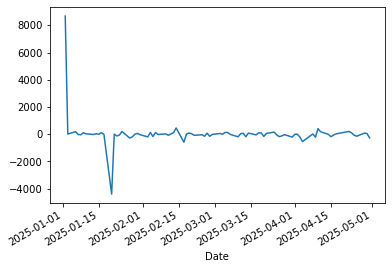

In [174]:
mod_sari_fit.resid.plot()

<AxesSubplot:ylabel='Density'>

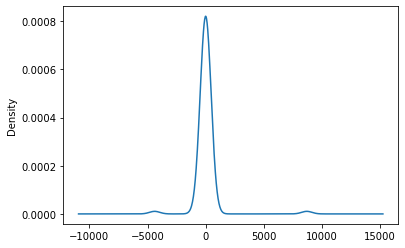

In [175]:
mod_sari_fit.resid.plot(kind='kde')

In [176]:
test_data['Pred_Sari_yearly']=pred1

C:\Users\91974\AppData\Local\Temp\ipykernel_19380\2708108054.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Pred_Sari_yearly']=pred1


In [177]:
test_data

,BUYER,SELLER,Mean,First_diff,Pred_Sari_yearly
Date,,,,,
2025-04-16,9082.0,9083.0,9082.50,-11.00,9146.798782
2025-04-17,9103.0,9104.0,9103.50,21.00,9074.468153
2025-04-22,9293.0,9293.5,9293.25,189.75,9086.077238
2025-04-23,9416.0,9416.5,9416.25,123.00,9307.541944
2025-04-24,9410.0,9410.5,9410.25,-6.00,9476.506169
2025-04-25,9363.5,9364.0,9363.75,-46.50,9507.858865
2025-04-28,9365.0,9365.5,9365.25,1.50,9281.456571
2025-04-29,9486.5,9487.5,9487.00,121.75,9436.042431
2025-04-30,9203.0,9204.0,9203.50,-283.50,9466.636060


In [178]:
pred1

Date
2025-04-16    9146.798782
2025-04-17    9074.468153
2025-04-22    9086.077238
2025-04-23    9307.541944
2025-04-24    9476.506169
2025-04-25    9507.858865
2025-04-28    9281.456571
2025-04-29    9436.042431
2025-04-30    9466.636060
Name: predicted_mean, dtype: float64

In [179]:
test_data

,BUYER,SELLER,Mean,First_diff,Pred_Sari_yearly
Date,,,,,
2025-04-16,9082.0,9083.0,9082.50,-11.00,9146.798782
2025-04-17,9103.0,9104.0,9103.50,21.00,9074.468153
2025-04-22,9293.0,9293.5,9293.25,189.75,9086.077238
2025-04-23,9416.0,9416.5,9416.25,123.00,9307.541944
2025-04-24,9410.0,9410.5,9410.25,-6.00,9476.506169
2025-04-25,9363.5,9364.0,9363.75,-46.50,9507.858865
2025-04-28,9365.0,9365.5,9365.25,1.50,9281.456571
2025-04-29,9486.5,9487.5,9487.00,121.75,9436.042431
2025-04-30,9203.0,9204.0,9203.50,-283.50,9466.636060


<AxesSubplot:xlabel='Date'>

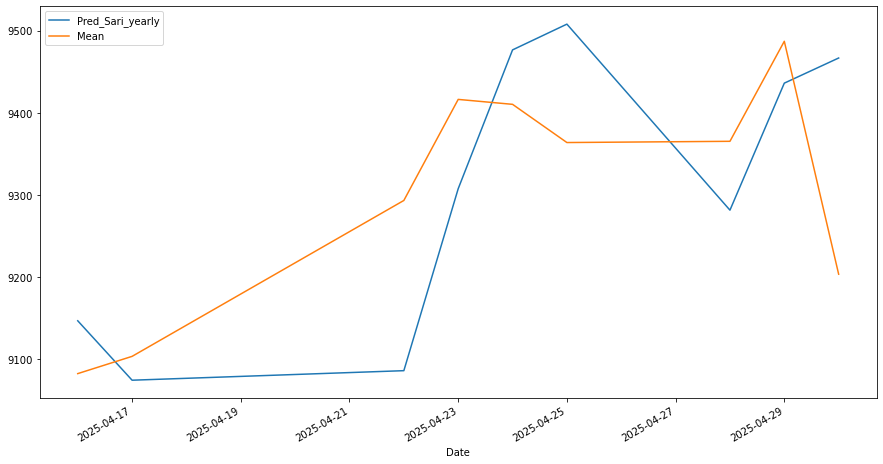

In [180]:
test_data[['Pred_Sari_yearly','Mean']].plot(figsize=(15,8))

In [181]:
mod_sari2=SARIMAX(df['Mean'],order=(1,1,1),seasonal_order=(1,1,1,4))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [182]:
mod_sari2_fit=mod_sari2.fit()

In [183]:
pred2=mod_sari2_fit.predict(start=pred_start_date,end=pred_end_date)


<AxesSubplot:xlabel='Date'>

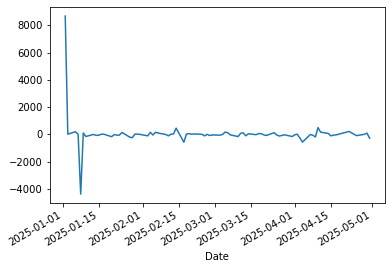

In [184]:
mod_sari2_fit.resid.plot()

<AxesSubplot:ylabel='Density'>

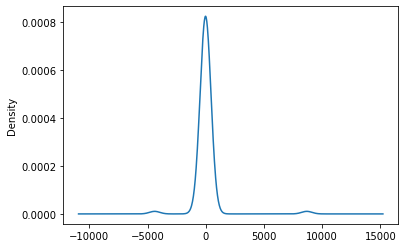

In [185]:
mod_sari2_fit.resid.plot(kind='kde')

In [186]:
pred2

Date
2025-04-16    9137.659134
2025-04-17    9146.038756
2025-04-22    9080.735378
2025-04-23    9301.989882
2025-04-24    9412.580762
2025-04-25    9457.453225
2025-04-28    9361.484783
2025-04-29    9399.123924
2025-04-30    9486.554196
Name: predicted_mean, dtype: float64

In [187]:
test_data['Pred_sari_Quarter']=pred2

C:\Users\91974\AppData\Local\Temp\ipykernel_19380\3860261309.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Pred_sari_Quarter']=pred2


In [188]:
test_data

,BUYER,SELLER,Mean,First_diff,Pred_Sari_yearly,Pred_sari_Quarter
Date,,,,,,
2025-04-16,9082.0,9083.0,9082.50,-11.00,9146.798782,9137.659134
2025-04-17,9103.0,9104.0,9103.50,21.00,9074.468153,9146.038756
2025-04-22,9293.0,9293.5,9293.25,189.75,9086.077238,9080.735378
2025-04-23,9416.0,9416.5,9416.25,123.00,9307.541944,9301.989882
2025-04-24,9410.0,9410.5,9410.25,-6.00,9476.506169,9412.580762
2025-04-25,9363.5,9364.0,9363.75,-46.50,9507.858865,9457.453225
2025-04-28,9365.0,9365.5,9365.25,1.50,9281.456571,9361.484783
2025-04-29,9486.5,9487.5,9487.00,121.75,9436.042431,9399.123924
2025-04-30,9203.0,9204.0,9203.50,-283.50,9466.636060,9486.554196


<AxesSubplot:xlabel='Date'>

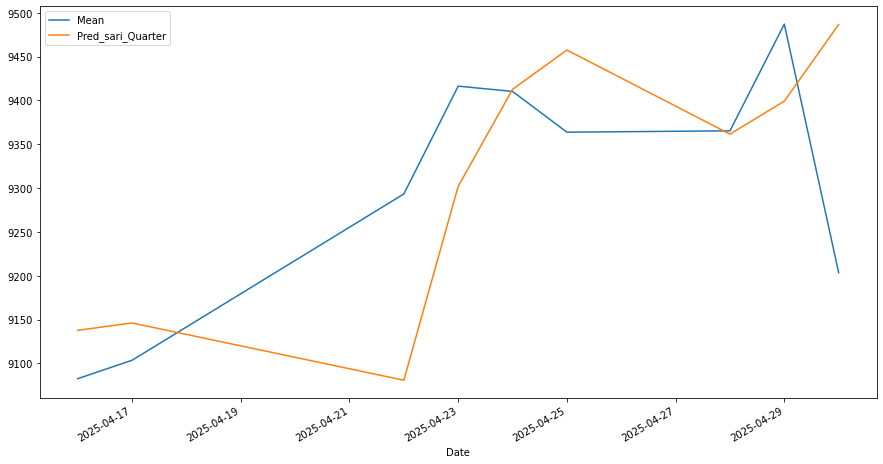

In [189]:
test_data[['Mean','Pred_sari_Quarter']].plot(figsize=(15,8))

In [190]:
test_data[['Mean','Pred_sari_Quarter','Pred_Sari_yearly']]

,Mean,Pred_sari_Quarter,Pred_Sari_yearly
Date,,,
2025-04-16,9082.50,9137.659134,9146.798782
2025-04-17,9103.50,9146.038756,9074.468153
2025-04-22,9293.25,9080.735378,9086.077238
2025-04-23,9416.25,9301.989882,9307.541944
2025-04-24,9410.25,9412.580762,9476.506169
2025-04-25,9363.75,9457.453225,9507.858865
2025-04-28,9365.25,9361.484783,9281.456571
2025-04-29,9487.00,9399.123924,9436.042431
2025-04-30,9203.50,9486.554196,9466.636060


<AxesSubplot:xlabel='Date'>

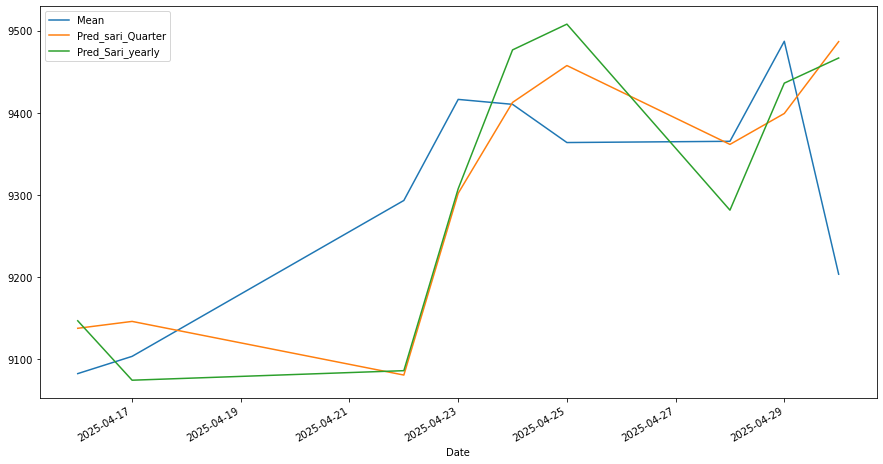

In [191]:
test_data[['Mean','Pred_sari_Quarter','Pred_Sari_yearly']].plot(figsize=(15,8))

In [192]:

# Example setup (assumes df and airline already exist with datetime index)
last_date = df.index[-1]  # Should be 2025-04-30
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), end='2025-05-15', freq='D')

# Create future dataframes with the same structure but empty values
future_df = pd.DataFrame(index=future_dates, columns=df.columns)
future_cop_price = pd.DataFrame(index=future_dates, columns=df.columns)


In [193]:
future_cop_price

,BUYER,SELLER,Mean,First_diff
2025-05-01,NaN,NaN,NaN,NaN
2025-05-02,NaN,NaN,NaN,NaN
2025-05-03,NaN,NaN,NaN,NaN
2025-05-04,NaN,NaN,NaN,NaN
2025-05-05,NaN,NaN,NaN,NaN
2025-05-06,NaN,NaN,NaN,NaN
2025-05-07,NaN,NaN,NaN,NaN
2025-05-08,NaN,NaN,NaN,NaN
2025-05-09,NaN,NaN,NaN,NaN
2025-05-10,NaN,NaN,NaN,NaN


In [194]:
df.tail()

,BUYER,SELLER,Mean,First_diff
Date,,,,
2025-04-24,9410.0,9410.5,9410.25,-6.00
2025-04-25,9363.5,9364.0,9363.75,-46.50
2025-04-28,9365.0,9365.5,9365.25,1.50
2025-04-29,9486.5,9487.5,9487.00,121.75
2025-04-30,9203.0,9204.0,9203.50,-283.50


In [195]:
future_cop_price=pd.concat([df,future_cop_price])

In [196]:
future_cop_price

,BUYER,SELLER,Mean,First_diff
2025-01-02,8685.0,8685.5,8685.25,NaN
2025-01-03,8700.5,8701.0,8700.75,15.5
2025-01-06,8893.0,8893.5,8893.25,192.5
2025-01-07,8885.5,8886.0,8885.75,-7.5
2025-01-08,8846.5,8847.0,8846.75,-39.0
...,...,...,...,...
2025-05-11,NaN,NaN,NaN,NaN
2025-05-12,NaN,NaN,NaN,NaN
2025-05-13,NaN,NaN,NaN,NaN
2025-05-14,NaN,NaN,NaN,NaN


In [198]:
forecast_result = mod_sari_fit.get_forecast(steps=15)
future_cop_price.loc[future_dates, 'Forecast'] = forecast_result.predicted_mean.values

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<AxesSubplot:>

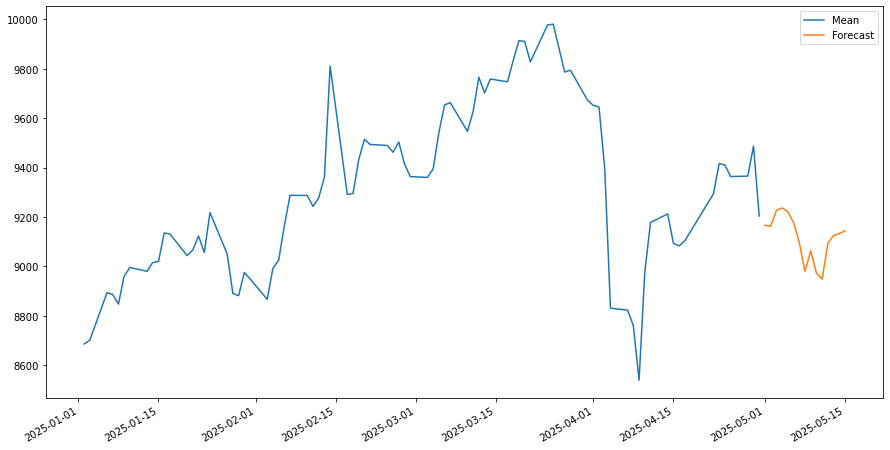

In [200]:
future_cop_price[['Mean','Forecast']].plot(figsize=(15,8))

In [201]:
future_cop_price

,BUYER,SELLER,Mean,First_diff,Forecast
2025-01-02,8685.0,8685.5,8685.25,NaN,NaN
2025-01-03,8700.5,8701.0,8700.75,15.5,NaN
2025-01-06,8893.0,8893.5,8893.25,192.5,NaN
2025-01-07,8885.5,8886.0,8885.75,-7.5,NaN
2025-01-08,8846.5,8847.0,8846.75,-39.0,NaN
...,...,...,...,...,...
2025-05-11,NaN,NaN,NaN,NaN,8948.417837
2025-05-12,NaN,NaN,NaN,NaN,9093.124577
2025-05-13,NaN,NaN,NaN,NaN,9124.888902
2025-05-14,NaN,NaN,NaN,NaN,9132.231438


In [205]:
future_cop_price['Forecast']

2025-01-02            NaN
2025-01-03            NaN
2025-01-06            NaN
2025-01-07            NaN
2025-01-08            NaN
                 ...     
2025-05-11    8948.417837
2025-05-12    9093.124577
2025-05-13    9124.888902
2025-05-14    9132.231438
2025-05-15    9143.646074
Name: Forecast, Length: 98, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


'\nmean_ci means the upper and lower bounds\n\n'

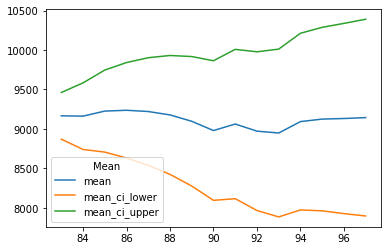